In [1]:
# 导入相关包
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC

In [2]:
# 导入人脸数据
data_home = '.\\'
lfw_people = fetch_lfw_people(data_home=data_home, min_faces_per_person=70, resize=0.4)

# 打印图片信息
n_sampltes, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("人脸信息：")
print("高：%d 宽：%d" % (h, w))
print("样本数量：%d" % n_sampltes)
print("样本维度：%d" % n_features)
print("标签种类：%d" % n_classes)

人脸信息：
高：50 宽：37
样本数量：1288
样本维度：1850
标签种类：7


In [3]:
# 可视化
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

In [4]:
# 数据分离
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
# 降维维数
n_components = 150
print("从 %d 维降到 %d 维" % (n_features, n_components))

从 1850 维降到 150 维


In [5]:
# 定义SVM训练器
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)

In [6]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf.fit(X_train_pca, y_train)
y_score_pca = clf.decision_function(X_test_pca)
y_pred = clf.predict(X_test_pca)
# 预测
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.54      0.64        13
     Colin Powell       0.83      0.87      0.85        60
  Donald Rumsfeld       0.94      0.63      0.76        27
    George W Bush       0.83      0.98      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.81      0.88        36

         accuracy                           0.86       322
        macro avg       0.90      0.74      0.80       322
     weighted avg       0.87      0.86      0.85       322

[[  7   1   0   5   0   0   0]
 [  2  52   0   6   0   0   0]
 [  0   2  17   8   0   0   0]
 [  0   3   0 143   0   0   0]
 [  0   1   0   3  20   0   1]
 [  0   3   0   3   1   8   0]
 [  0   1   1   5   0   0  29]]


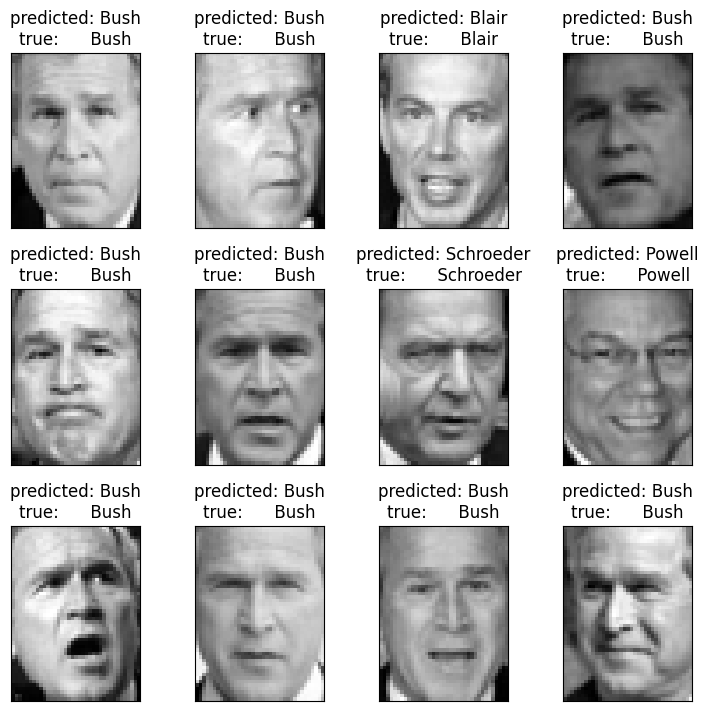

In [7]:
# PCA可视化
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

In [8]:
# KPCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=n_components,kernel='cosine').fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)

clf.fit(X_train_kpca, y_train)
y_score_kpca = clf.decision_function(X_test_kpca)
y_pred = clf.predict(X_test_kpca)
# 预测
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.52      0.85      0.65        13
     Colin Powell       0.81      0.78      0.80        60
  Donald Rumsfeld       0.58      0.67      0.62        27
    George W Bush       0.91      0.85      0.88       146
Gerhard Schroeder       0.72      0.84      0.78        25
      Hugo Chavez       0.90      0.60      0.72        15
       Tony Blair       0.70      0.72      0.71        36

         accuracy                           0.80       322
        macro avg       0.74      0.76      0.74       322
     weighted avg       0.81      0.80      0.80       322

[[ 11   0   2   0   0   0   0]
 [  3  47   2   6   0   0   2]
 [  4   1  18   2   1   0   1]
 [  1   6   6 124   3   0   6]
 [  0   0   1   1  21   1   1]
 [  0   2   0   1   2   9   1]
 [  2   2   2   2   2   0  26]]


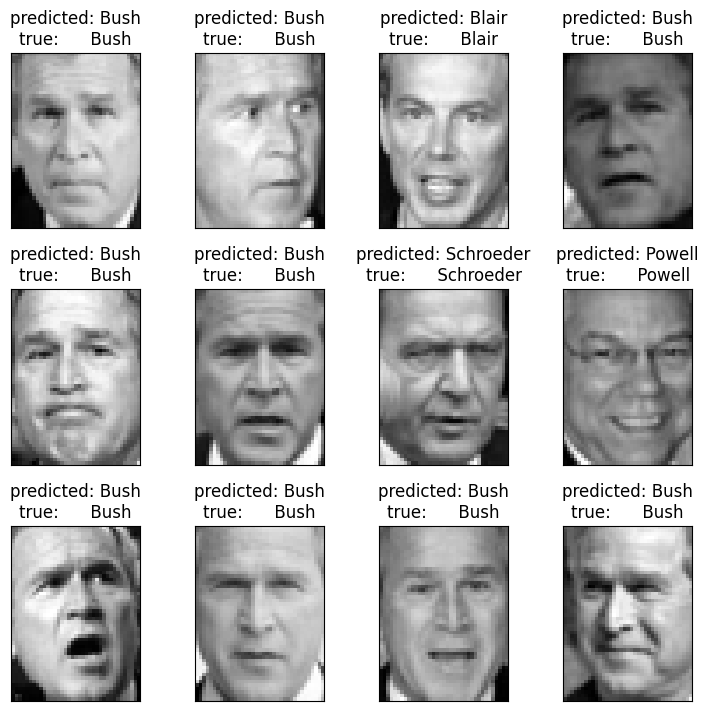

In [9]:
# PCA可视化
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

In [10]:
# LLE 
from sklearn.manifold import LocallyLinearEmbedding 

lle = LocallyLinearEmbedding(n_components = n_components, n_neighbors = 200, neighbors_algorithm='auto').fit(X_train)

X_train_lle = lle.transform(X_train)
X_test_lle = lle.transform(X_test)

clf.fit(X_train_lle, y_train)
y_score_lle = clf.decision_function(X_test_lle)
y_pred = clf.predict(X_test_lle)
# 预测
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.77      0.69        13
     Colin Powell       0.85      0.87      0.86        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.87      0.90      0.89       146
Gerhard Schroeder       0.73      0.76      0.75        25
      Hugo Chavez       0.79      0.73      0.76        15
       Tony Blair       0.75      0.67      0.71        36

         accuracy                           0.82       322
        macro avg       0.77      0.77      0.77       322
     weighted avg       0.82      0.82      0.82       322

[[ 10   1   2   0   0   0   0]
 [  1  52   0   5   0   1   1]
 [  4   2  18   3   0   0   0]
 [  1   3   3 131   2   2   4]
 [  0   0   0   3  19   0   3]
 [  0   1   0   1   2  11   0]
 [  0   2   0   7   3   0  24]]


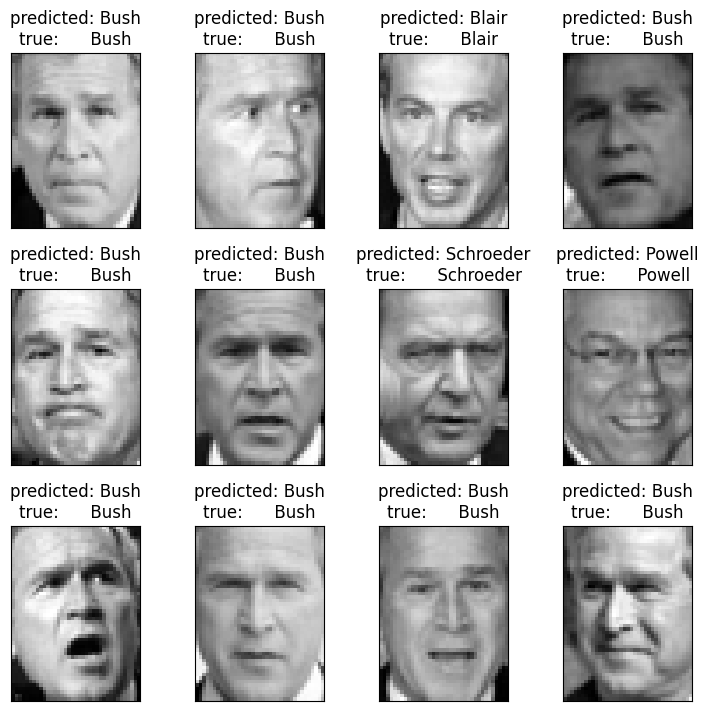

In [11]:
# PCA可视化
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

In [12]:
# ISOMAP 
from sklearn.manifold import Isomap

isomap = Isomap(n_components=n_components, n_neighbors=200, neighbors_algorithm='auto').fit(X_train)

X_train_isomap = isomap.transform(X_train)
X_test_isomap = isomap.transform(X_test)

clf.fit(X_train_isomap, y_train)
y_score_isomap = clf.decision_function(X_test_isomap)
y_pred = clf.predict(X_test_isomap)
# 预测
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.30      0.23      0.26        13
     Colin Powell       0.66      0.70      0.68        60
  Donald Rumsfeld       0.59      0.48      0.53        27
    George W Bush       0.72      0.89      0.80       146
Gerhard Schroeder       0.78      0.56      0.65        25
      Hugo Chavez       0.56      0.33      0.42        15
       Tony Blair       0.78      0.39      0.52        36

         accuracy                           0.69       322
        macro avg       0.63      0.51      0.55       322
     weighted avg       0.68      0.69      0.67       322

[[  3   4   2   4   0   0   0]
 [  4  42   3  10   1   0   0]
 [  1   3  13  10   0   0   0]
 [  2   6   2 130   1   3   2]
 [  0   1   2   7  14   0   1]
 [  0   4   0   4   1   5   1]
 [  0   4   0  16   1   1  14]]


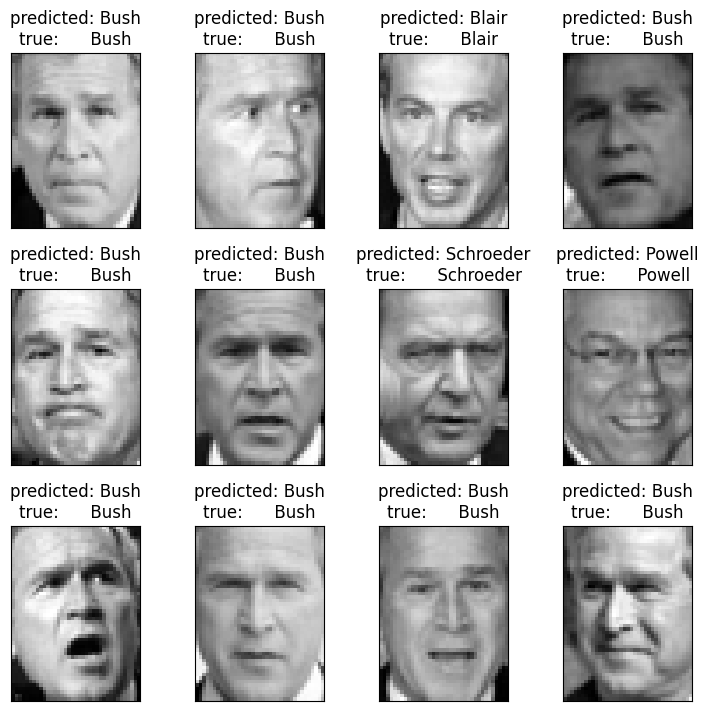

In [13]:
# PCA可视化
prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)
plt.show()

In [14]:
# 绘制多模型的ROC曲线
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def draw_roc(models, y_scores, y_test, colors): 
    plt.figure()
    y_test = label_binarize(y_test, classes= [i for i in range(n_classes)])
    for n_i, model in enumerate(models):
        y_score = y_scores[model]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes): 
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        lw = 2
        plt.plot(fpr[2], tpr[2], color = colors[n_i], lw = lw, label = '%s ROC curve( area = %0.2f )' % (model, roc_auc[2]))
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.legend(loc = 4)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.show()

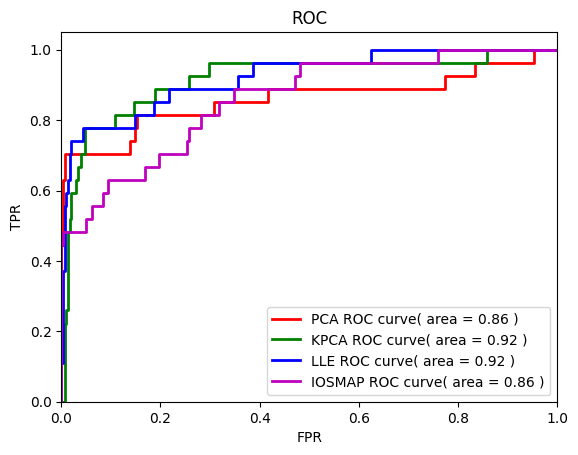

In [15]:
colors = ['r',  'g',  'b',  'm'  ]
models = ['PCA', 'KPCA', 'LLE', 'IOSMAP']
y_scores ={
    'PCA':  y_score_pca ,
    'KPCA': y_score_kpca, 
    'LLE': y_score_lle, 
    'IOSMAP': y_score_isomap
}
draw_roc(models, y_scores, y_test, colors)